## Previsão de Potência de Turbinas Eólicas
### Neste estudo, vou prever a produção de energia de uma turbina eólica usando os dados de velocidade do vento, direção do vento, mês e hora.

#### O conjunto de dados consiste em 50530 linhas e com 5 colunas. 

#### O conjunto de dados contém:

* Data/Hora: Para intervalos de 10 minutos
* Potencia_Real (kW): A potência gerada pela turbina naquele momento.
* Velocidade_Vento (m/s): A velocidade do vento que a turbina usa para geração de eletricidade.
* Potencia_Teorica (KWh): Os valores de potência teórica que a turbina gera com aquela velocidade do vento que é fornecida pelo fabricante da turbina
* Direção_Vento (°): A direção do vento na altura do cubo da turbina.

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

# LEITURA E EXPLORAÇÂO DOS DADOS

In [2]:
# Lendo o Arquivo
turbina = pd.read_csv('T1.csv')
turbina.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
# Renomear colunas
turbina.columns = ['Data', 'Potencia_Real', 'Velocidade_Vento', 'Potencia_Teorica','Direção_Vento']
turbina.head()

,Data,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
turbina.shape

(50530, 5)

In [5]:
turbina.describe()

,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
turbina.isnull().sum()

Data                0
Potencia_Real       0
Velocidade_Vento    0
Potencia_Teorica    0
Direção_Vento       0
dtype: int64

# Outliers

##### Para iniciarmos a análise iremos plotar os dados brutos.
##### O segundo passo será plotar os boxplot das colunas de dados para verificarmos se há outliers
#####  Após isso irmeos tratar todas as inconsistências encontradas

In [7]:
def grafico_geral(dado):
    plt.figure(figsize=(25,15))
    plt.plot(dado['Velocidade_Vento'], dado['Potencia_Real'], 'o', label='Potência real (kW)')
    plt.plot(dado['Velocidade_Vento'], dado['Potencia_Teorica'], '.', label='Potência teórica(KWh)')
    plt.xlabel('Velocidade do Vento (m/s)', size=25)
    plt.ylabel('Potência Real (kw)', size=25)
    plt.title('PREVISÃO DE PRODUÇÃO DE ENERGIA POR TURBINA EÓLICA', size=30)
    plt.legend(fontsize=25)
    plt.show()

def grafico_boxplot(posicao, coluna, dado, cor, label):
    ax1 = fig.add_subplot(posicao)
    sns.boxplot(y=coluna, data=dado, color = cor,width = 0.6)
    ax1.tick_params(labelsize=20)
    ax1.set_xlabel(label, fontsize=25)

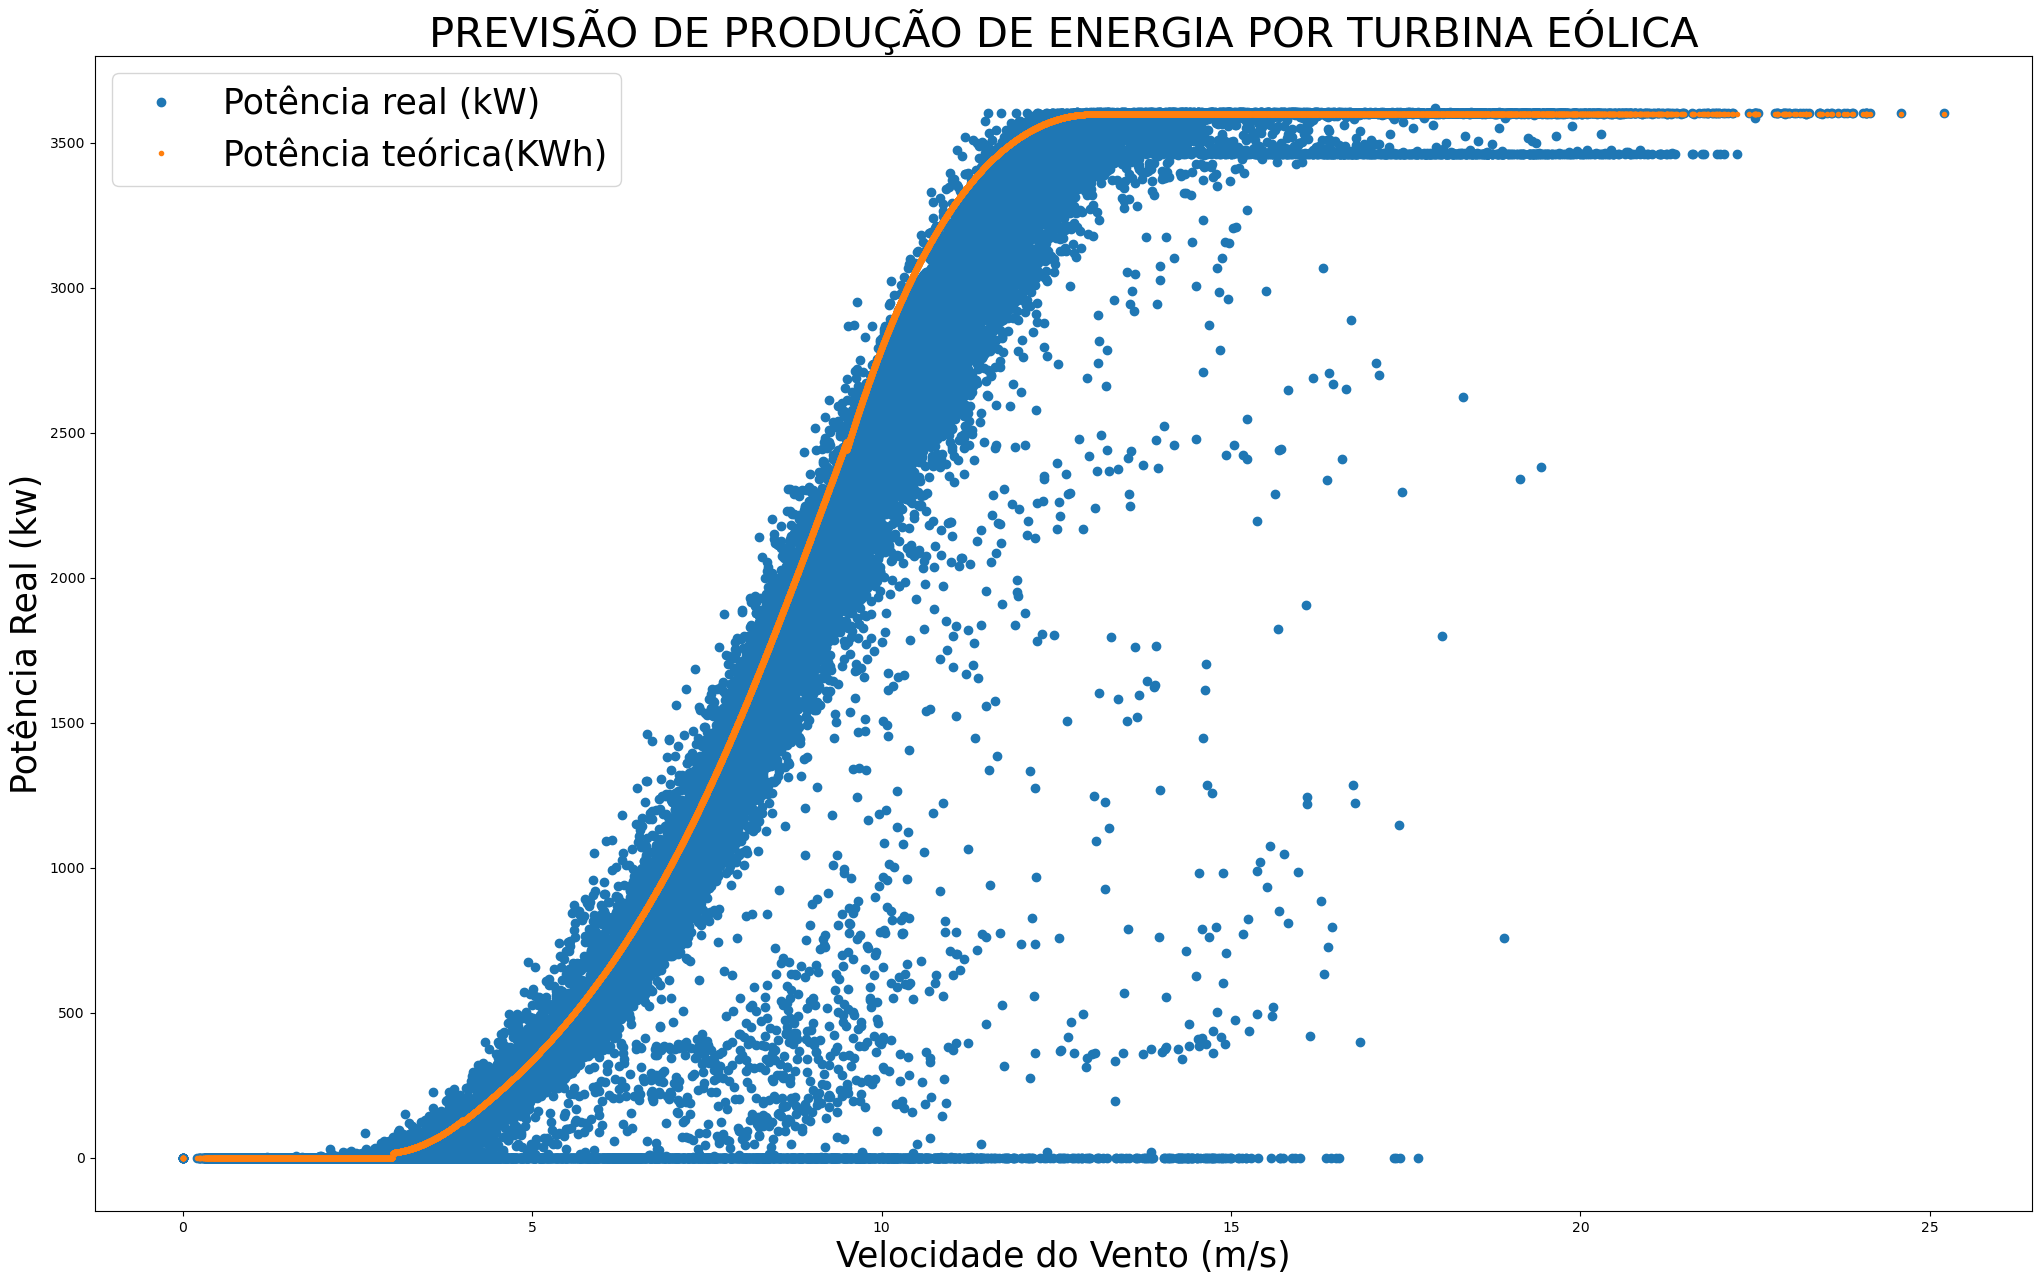

In [8]:
grafico_geral(turbina)

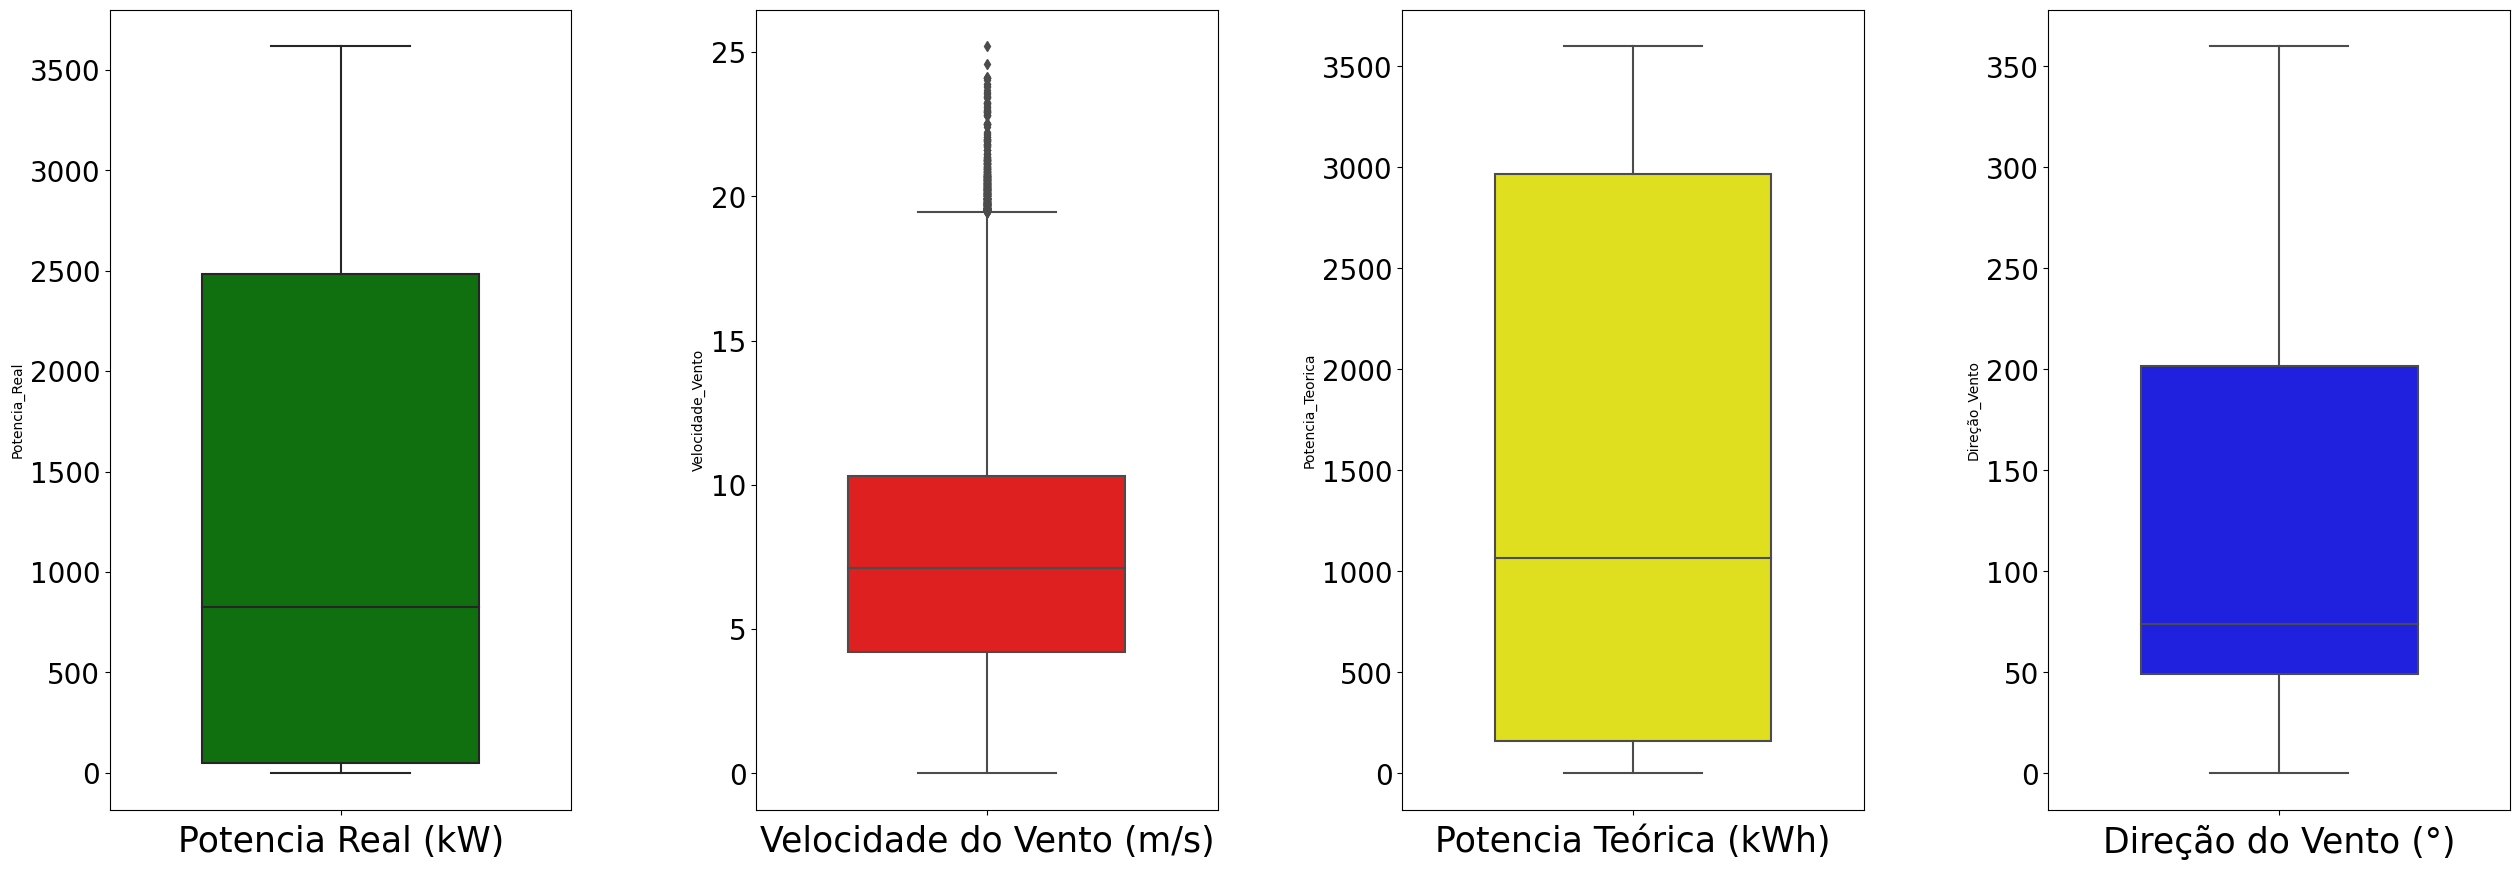

In [9]:
fig = plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)


grafico_boxplot(141, 'Potencia_Real', turbina, 'green', 'Potencia Real (kW)')
grafico_boxplot(142, 'Velocidade_Vento', turbina, 'red', 'Velocidade do Vento (m/s)')
grafico_boxplot(143, 'Potencia_Teorica', turbina, 'yellow', 'Potencia Teórica (kWh)')
grafico_boxplot(144, 'Direção_Vento', turbina, 'blue', 'Direção do Vento (°)')

#### Verificando tudo que foi feito até agora, foram encontrados os seguintes dados fora do padrão:

1. Na descrição do dataframe ('turbina.describe()'), encontramos potência real negativa (< 0 KW) nos dados. Na Física, potência negativa é normal, significa perda de potência devido ao atrito. Não sabemos se é fisicamente verdadeiro ou se são registros errôneos, não queremos prever potências negativas. Então, vamos removê-las.
2. Nos gráficos de Boxplot, podemos verificar que existem alguns valores discrepantes nos dados de velocidade do vento. Foram encontrados dados acima do limite superior e analisaremos os valores discrepantes e os trataremos.
3. Outro problema, foi encontrado no gráfico ('PREVISÃO DE PRODUÇÃO DE ENERGIA POR TURBINA EÓLICA'), plotado acima. Podemos verificar que existem valores zerados, mesmo quando a velocidade do vento é alta. Isso pode ocorrer por falha na leitura dos dados, falha na própria turbina, parada para manutenção ou outra decisão operacional. Não temos como tratar esses dados então iremos removê-los também.

##### Verificando os dados de potência negativa, removendo as inconsistências e verificando o dataframe resultante.

In [10]:
df_potenciaZero = pd.DataFrame(turbina)
# Verifica a quantidade de valores com potência real menor que zero
df_potenciaZero = df_potenciaZero[df_potenciaZero.Potencia_Real < 0]
df_potenciaZero.shape

(57, 5)

In [11]:
df_turbina = pd.DataFrame(turbina)
# Remove os valores de energia negativa
df_turbina = df_turbina[df_turbina.Potencia_Real>=0]
df_turbina.describe()

,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
count,50473.000000,50473.000000,50473.000000,50473.000000
mean,1309.161489,7.563317,1493.846082,123.648102
std,1312.463427,4.226509,1367.885865,93.446383
min,0.000000,0.000000,0.000000,0.000000
25%,52.740540,4.210382,163.084179,49.304878
50%,828.006714,7.111886,1067.161300,73.660378
75%,2484.364014,10.303410,2966.774233,201.684006
max,3618.732910,25.206011,3600.000000,359.997589


In [12]:
df_turbina.shape

(50473, 5)

##### Analisaremos os outliers encontrados, iremos fazer o tratamento dos mesmos com o método da Variação Interquartil (IQR) e verificando o dataframe resultante.

In [13]:
df_velocidadeVento = pd.DataFrame(df_turbina['Velocidade_Vento'])
Q1 = df_velocidadeVento['Velocidade_Vento'].quantile(0.25)
Q3 = df_velocidadeVento['Velocidade_Vento'].quantile(0.75)
IQR = Q3-Q1

inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

print(f'Quantile (0.25): {Q1} | Quantile (0.75): {Q3}')
print(f'Limiar inferior : {inferior} | Limiar superior: {superior}')

Quantile (0.25): 4.21038198471069 | Quantile (0.75): 10.303409576416
Limiar inferior : -4.929159402847276 | Limiar superior: 19.442950963973963


In [14]:
# Indexação dos Outliers
outlier_tf = (df_velocidadeVento['Velocidade_Vento'] < inferior) | (df_velocidadeVento['Velocidade_Vento'] > superior)

print('Número total de Outliers: ', len(df_velocidadeVento['Velocidade_Vento'][outlier_tf]))
print('--'*20)
print('Alguns exemplos de Outliers:')
print(df_velocidadeVento['Velocidade_Vento'][outlier_tf].sample(10))

Número total de Outliers:  426
----------------------------------------
Alguns exemplos de Outliers:
3970     20.781210
4303     20.637039
10299    20.246710
4159     19.716320
4282     23.230499
4208     20.344360
4221     20.124861
49470    19.926701
8731     20.463289
3929     19.653959
Name: Velocidade_Vento, dtype: float64


##### Segundo a análise, ocorreram 426 vezes que a velocidade do vento está acima do limite superior determinado pelo de Variação Interquartil, utilizado para análise dos dados.
##### Estes valores serão retirados do nosso dataframe.

In [15]:
df_turbina = df_turbina[turbina.Velocidade_Vento < superior]
df_turbina.describe()

C:\Users\tiago\AppData\Local\Temp\ipykernel_3132\2271405785.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_turbina = df_turbina[turbina.Velocidade_Vento < superior]


,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
count,50047.000000,50047.000000,50047.000000,50047.000000
mean,1289.901628,7.451863,1475.918503,123.024792
std,1301.247381,4.065983,1359.764155,93.593055
min,0.000000,0.000000,0.000000,0.000000
25%,47.846010,4.185936,158.316863,49.077471
50%,810.120483,7.069872,1047.755129,73.217621
75%,2433.914429,10.207705,2914.630128,201.649902
max,3618.732910,19.438259,3600.000000,359.997589


In [16]:
df_turbina.shape

(50047, 5)

##### Para tratarmos os valores zerados de potência, mesmo quando há velocidade de vento alta, precisamos primeiro determinar qual a velocidade de vento mínima para que a turbina inicie a produção de energia, depois podemos encontrar os dados no dataframe que possuem potência zerada e velocidade do vento acima do limite pré-detrminado, trataremos esses dados e verificando o dataframe resultante.

In [17]:
# Velocidade mínima do vento
df_ventoMinimo = pd.DataFrame(df_turbina)
df_ventoMinimo = df_ventoMinimo[df_ventoMinimo['Potencia_Teorica'] == 0]
print('Velocidade mínima do vento para iniciar a produção de energia: ', df_ventoMinimo['Velocidade_Vento'].max())

Velocidade mínima do vento para iniciar a produção de energia:  2.99958300590515


In [18]:
index_names = df_turbina[(df_turbina['Potencia_Real'] < 1) & (df_turbina['Velocidade_Vento'] > 3)].index

df_turbina.drop(index_names, inplace = True)
df_turbina.describe()

,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
count,46519.000000,46519.000000,46519.000000,46519.000000
mean,1387.727421,7.593717,1528.143711,122.992944
std,1298.424088,4.102899,1363.352667,92.862528
min,0.000000,0.000000,0.000000,0.000000
25%,164.481102,4.443331,210.100065,49.726336
50%,970.231079,7.244970,1130.190966,73.039146
75%,2569.496948,10.387305,3010.335484,201.398949
max,3618.732910,19.438259,3600.000000,359.997589


In [19]:
df_turbina.shape

(46519, 5)

##### Vericficando os dados após o tratamento dos Outliers

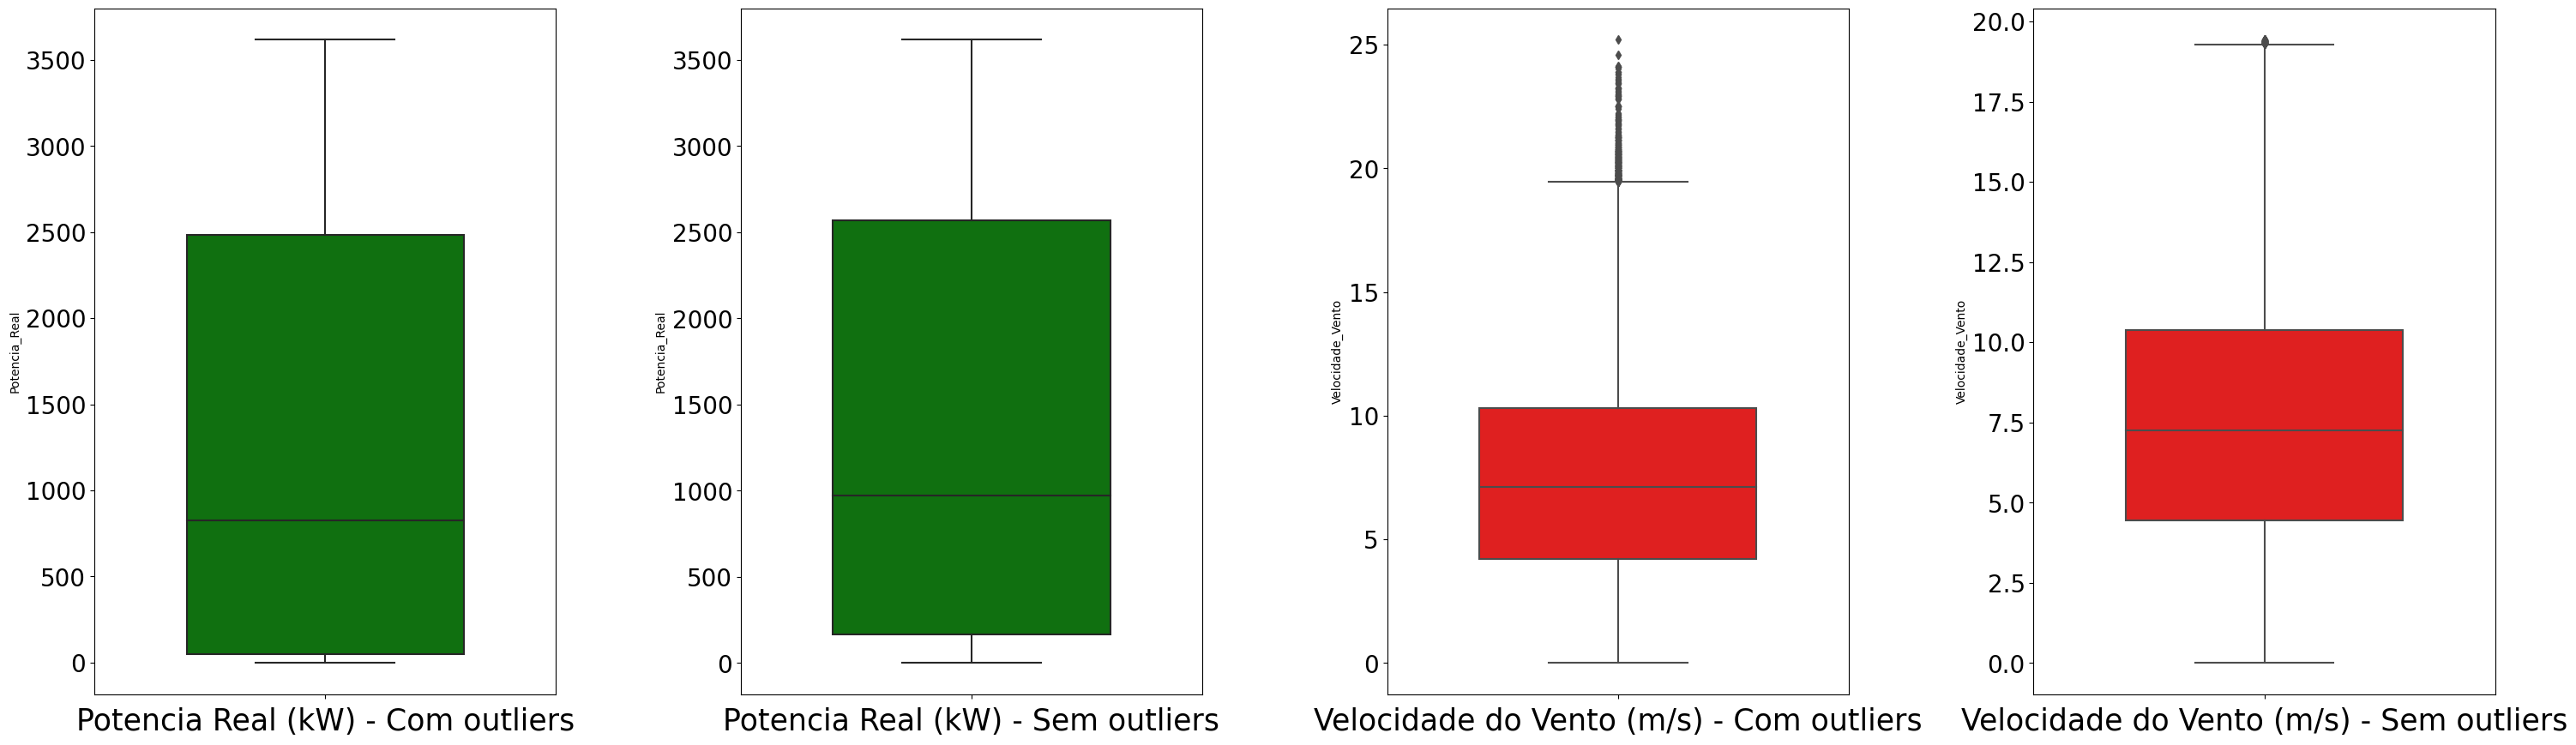

In [20]:
fig = plt.figure(figsize=(35,10))
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)

grafico_boxplot(141, 'Potencia_Real', turbina, 'green', 'Potencia Real (kW) - Com outliers')
grafico_boxplot(142, 'Potencia_Real', df_turbina, 'green', 'Potencia Real (kW) - Sem outliers')
grafico_boxplot(143, 'Velocidade_Vento', turbina, 'red', 'Velocidade do Vento (m/s) - Com outliers')
grafico_boxplot(144, 'Velocidade_Vento', df_turbina, 'red', 'Velocidade do Vento (m/s) - Sem outliers')

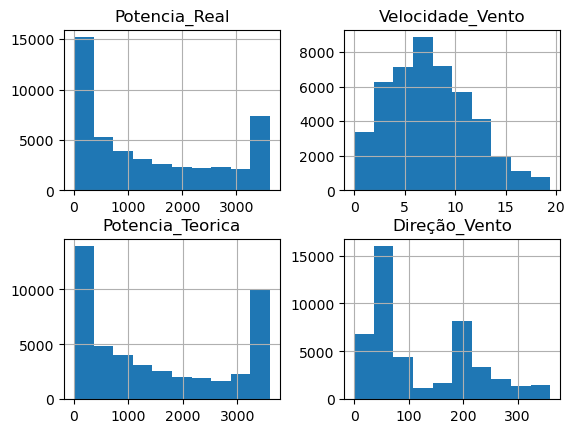

In [21]:
df_turbina.hist()
plt.show()

### Traçando potência vs velocidade do vento

##### Traçando a potência real x teórica, também fica claro que a função de potência real não reflete com precisão o potência de potência teórica, com muitos pontos de dados fora da curva que representa a potência teórica.

1. Existe uma faixa operacional 'normal' clara na qual a maioria dos dados existe
2. Parece haver dois limites superiores de potência separados.
3. Há uma população menor de dados com geração de energia significativamente abaixo da faixa operacional 'normal'.

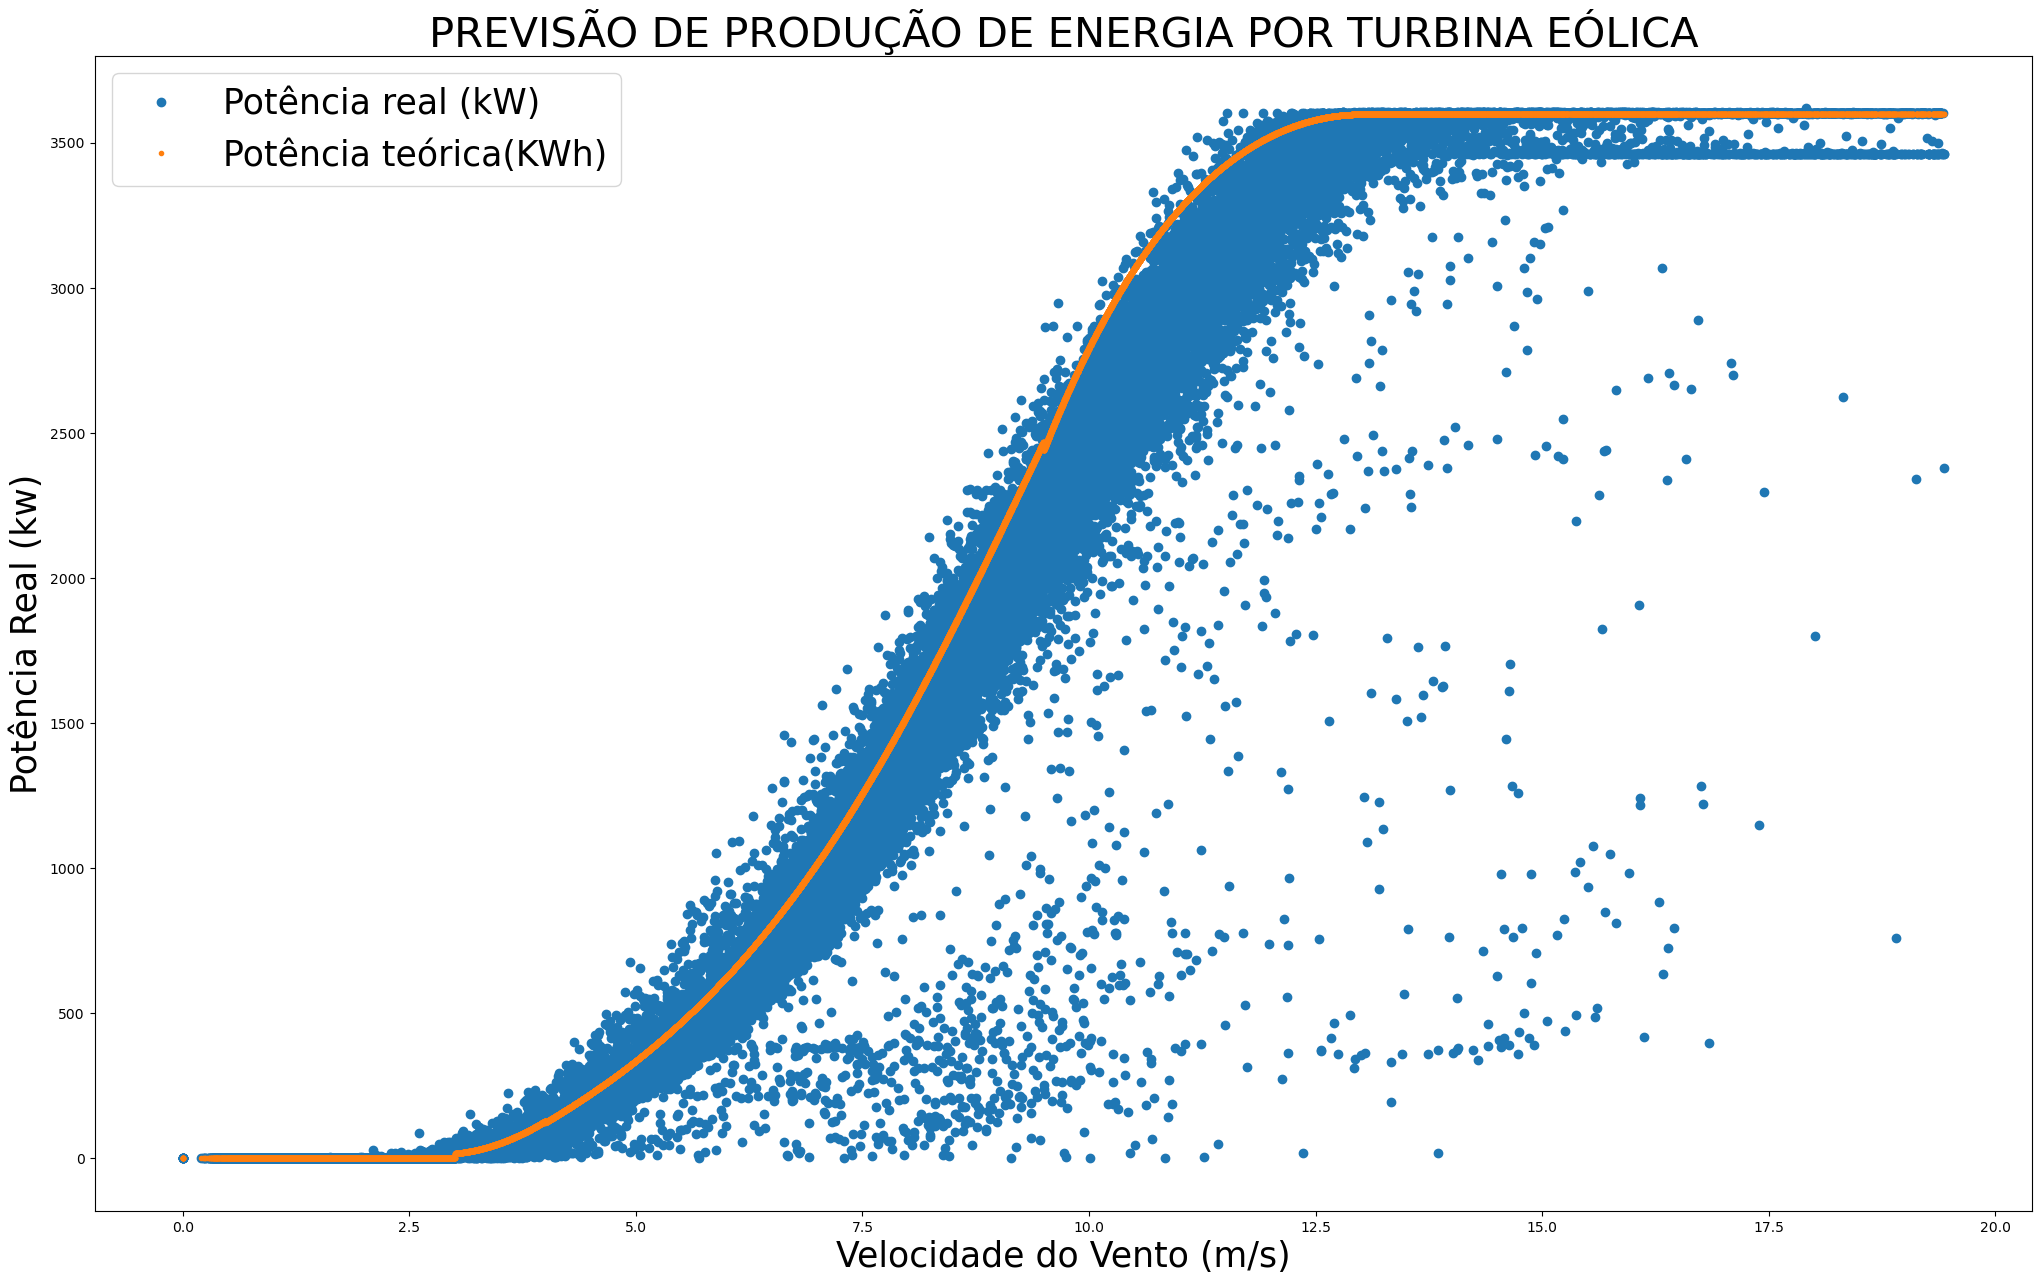

In [22]:
grafico_geral(df_turbina)

# Potência máxima

In [23]:
df_potenciaMaxima = pd.DataFrame(df_turbina)
df_potenciaMaxima = df_potenciaMaxima[df_potenciaMaxima['Velocidade_Vento'] >= 18]
df_potenciaMaxima.describe()

,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
count,551.000000,551.000000,551.0,551.000000
mean,3547.779831,18.684853,3600.0,191.386777
std,174.716141,0.417878,0.0,26.145616
min,757.390015,18.000811,3600.0,19.446150
25%,3462.628540,18.326305,3600.0,188.006248
50%,3601.823975,18.647480,3600.0,194.057800
75%,3602.708008,19.038310,3600.0,201.477554
max,3604.363037,19.438259,3600.0,226.251907


##### Como podemos ver as potência máxima da turbina é atingida com velocidade de vento igual a 18 m/s, e tem valor de 3600 KWh com o outro limite superior estando no entorno dos 3450 KWh

# Potência teórica x Potência real média

Muitos valores são plotados. Podemos agrupar os dados por velocidade do vento, ou seja, velocidade do vento 0,25-0,75, 0,75-1,25, etc., e depois calcular a média da potência ativa.

A verdadeira potência da turbina eólica não segue a curva de potência teórica do fabricante. Existe uma diferença entre potência teórica e ativa, chamada de Perda, a novidade que criamos anteriormente.

Também vemos que abaixo de 3,5 m/s de velocidade do vento, há 0 potência ativa (sem produção). Posteriormente, usaremos essa velocidade do vento de 3,5 m/s como corte.

In [24]:
df_potencia = pd.DataFrame(df_turbina)
interval = np.arange(0,26,0.5)
df_potencia.groupby(pd.cut(df_potencia['Velocidade_Vento'], interval)).mean().head()

,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento
Velocidade_Vento,,,,
"(0.0, 0.5]",0.000000,0.398759,0.0,177.146148
"(0.5, 1.0]",0.000000,0.778586,0.0,170.854432
"(1.0, 1.5]",0.000411,1.260064,0.0,175.189300
"(1.5, 2.0]",0.010602,1.758932,0.0,176.393404
"(2.0, 2.5]",0.148719,2.257803,0.0,165.097294


Text(0.5, 1.0, 'Potência teórica x Potência real média')

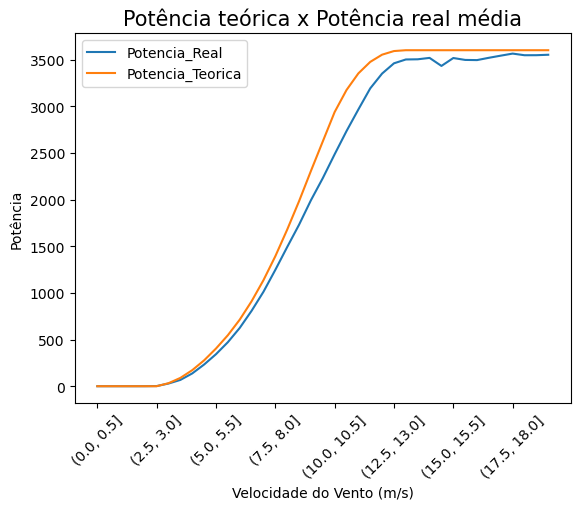

In [25]:
df_potencia.groupby(pd.cut(df_potencia['Velocidade_Vento'], interval)).mean().plot(y=['Potencia_Real', 'Potencia_Teorica'], rot=45)
plt.ylabel('Potência', size=10)
plt.xlabel('Velocidade do Vento (m/s)', size=10)
plt.title('Potência teórica x Potência real média', size=15)

##### Nesse passo vamos tirar manualmente os valores de potência real que estão muito fora da curva de potência teórica.

In [26]:
dicio = {}
passo = 50
i = 1
for x in range(20, 3400, passo):
    dicio[i] = df_potencia.iloc[((df_potencia['Potencia_Real']>=x)&((df_potencia['Potencia_Real']<x+passo))).values]
    i += 1
print(f'Há um total de {i-1} Dicionários')

Há um total de 68 Dicionários


In [27]:
dicio[69] = df_potencia.iloc[(df_turbina['Potencia_Real']>=3300).values]

In [28]:
def remover_outlier(dat, prop, min, max):
    d = dat
    q_baixo = d[prop].quantile(min)
    q_alto  = d[prop].quantile(max)
    return d[(d[prop] < q_alto) & (d[prop] > q_baixo)]

In [29]:
# Remove outlier
for x in range(1, 70):
    if x <= 3:
        F = 0.95
    elif ((x > 3) and (x <= 10)):
        F = 0.90
    elif ((x > 10) and (x <= 20)):
        F = 0.92
    elif ((x > 20) and (x < 30)):
        F = 0.96
    else:
        F = 0.985
    dicio[x] = remover_outlier(dicio[x], 'Velocidade_Vento', 0.0001, F)

In [30]:
df_outliers=pd.DataFrame()
for infile in range(1,70):
    data = dicio[infile]
    df_outliers=df_outliers.append(data,ignore_index=True)

C:\Users\tiago\AppData\Local\Temp\ipykernel_3132\3775918940.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_outliers=df_outliers.append(data,ignore_index=True)


In [31]:
df_outliers.shape

(37384, 5)

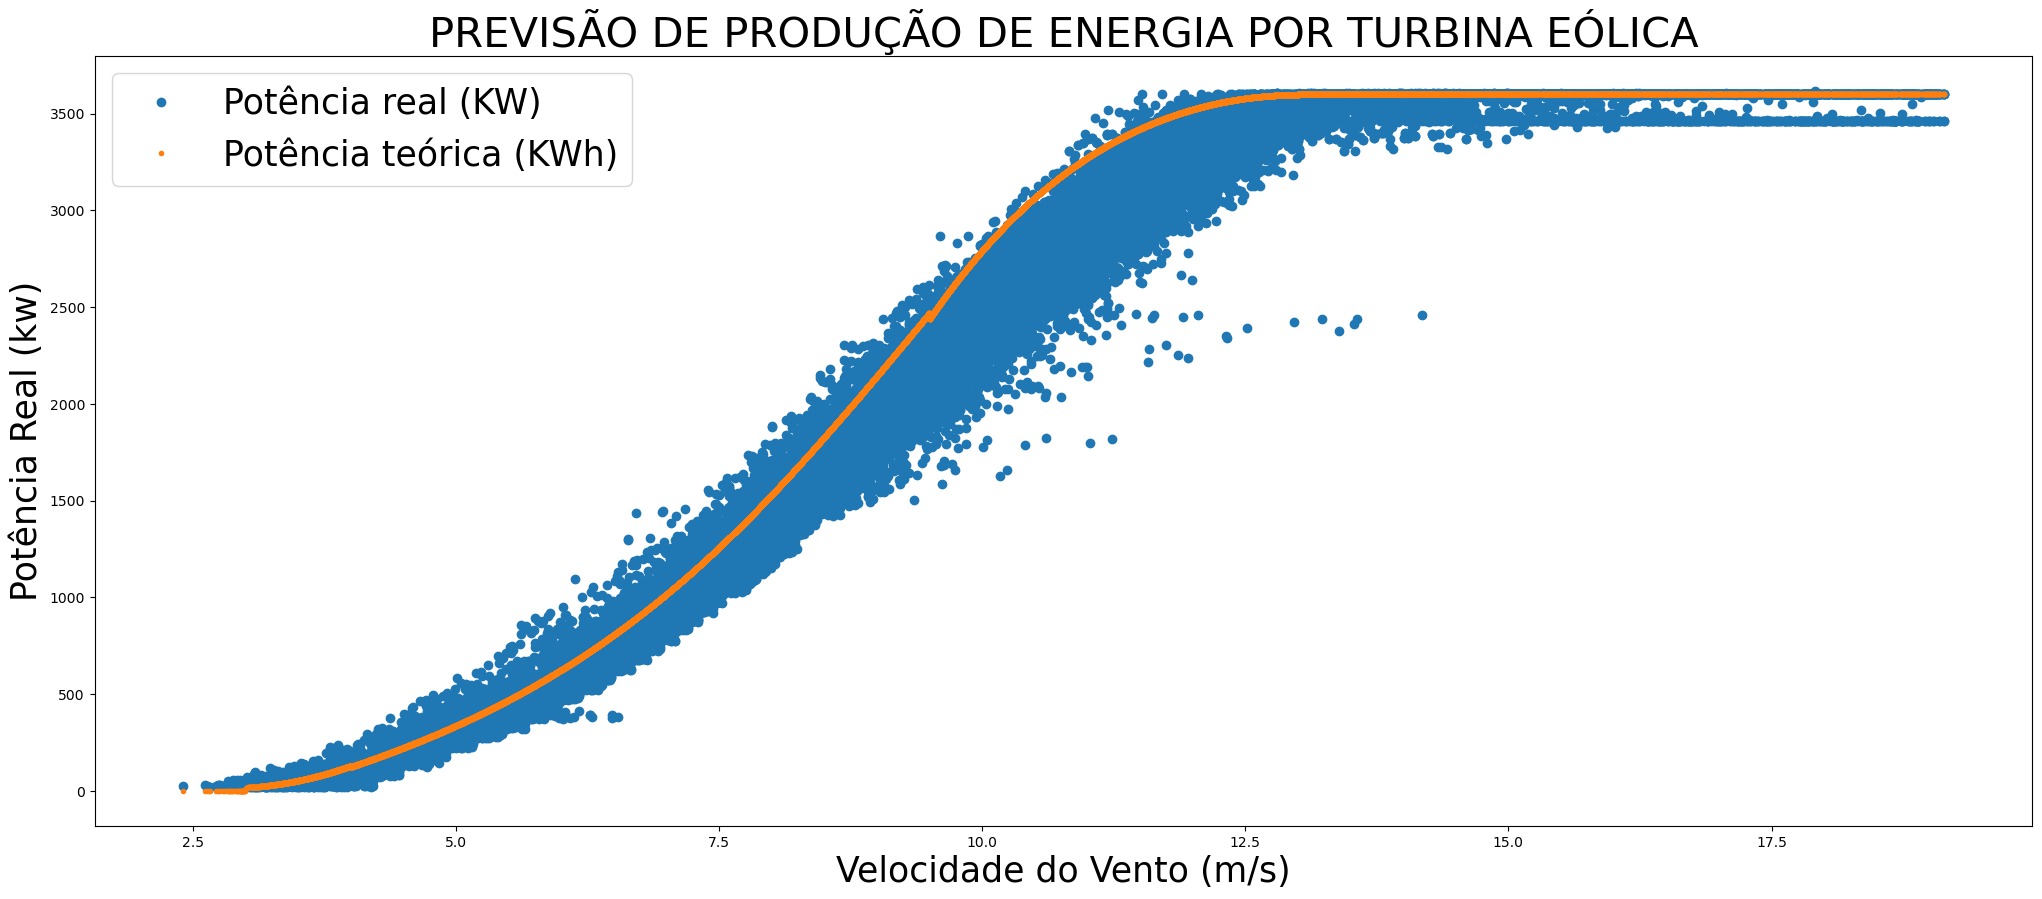

In [32]:
plt.figure(figsize=(25,10)) 
plt.plot(df_outliers['Velocidade_Vento'], df_outliers['Potencia_Real'], 'o', label='Potência real (KW)')
plt.plot(df_outliers['Velocidade_Vento'], df_outliers['Potencia_Teorica'], '.', label='Potência teórica (KWh)')
plt.xlabel('Velocidade do Vento (m/s)', size=25)
plt.ylabel('Potência Real (kw)', size=25)
plt.title('PREVISÃO DE PRODUÇÃO DE ENERGIA POR TURBINA EÓLICA', size=30)
plt.legend(fontsize=25)
plt.show()

Text(0.5, 1.0, 'Potência teórica x Potência real média')

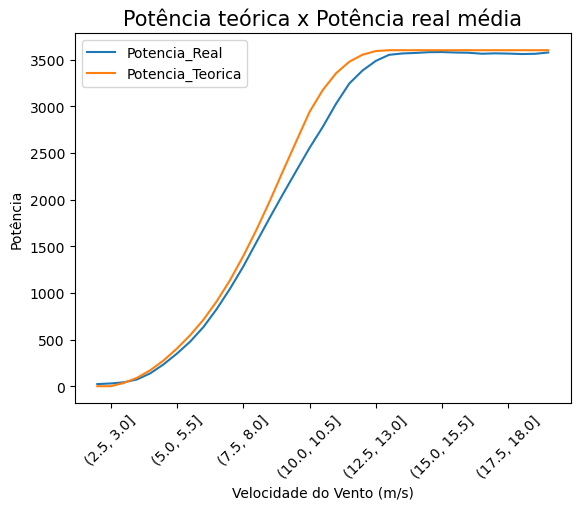

In [33]:
df_outliers.groupby(pd.cut(df_outliers['Velocidade_Vento'], interval)).mean().plot(y=['Potencia_Real', 'Potencia_Teorica'], rot=45)
plt.ylabel('Potência', size=10)
plt.xlabel('Velocidade do Vento (m/s)', size=10)
plt.title('Potência teórica x Potência real média', size=15)

##### Comparando os dois gráficos, podemos ver que sem os outliers as curvas de potência teórica e potência real, se aproximam, a curva da potência real fica mais estável. Mesmo assim podemos ver que a curva da potencia real apesar de estar próxima da curva de potência teórica, a curva da potencia real está abaixo da outra.

# Comparar média de potência por Hora e por Mês

In [34]:
df_HoraMes = pd.DataFrame(df_turbina)
df_HoraMes['Hora'] = pd.to_datetime(df_HoraMes['Data']).dt.hour
df_HoraMes['Mes'] = pd.to_datetime(df_HoraMes['Data']).dt.month
df_HoraMes.head()

,Data,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento,Hora,Mes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,1
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,0,1
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,0,1
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,0,1
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,0,1


Text(0.5, 0, 'Hora')

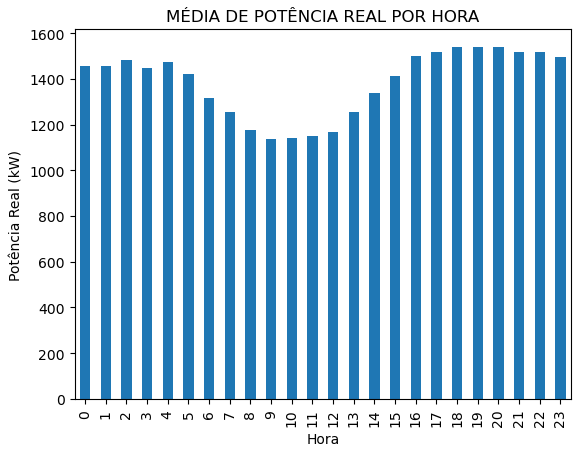

In [35]:
df_HoraMes.groupby('Hora').mean().Potencia_Real.plot(kind='bar', title='MÉDIA DE POTÊNCIA REAL POR HORA')
plt.ylabel('Potência Real (kW)')
plt.xlabel('Hora')

Text(0.5, 0, 'Mês')

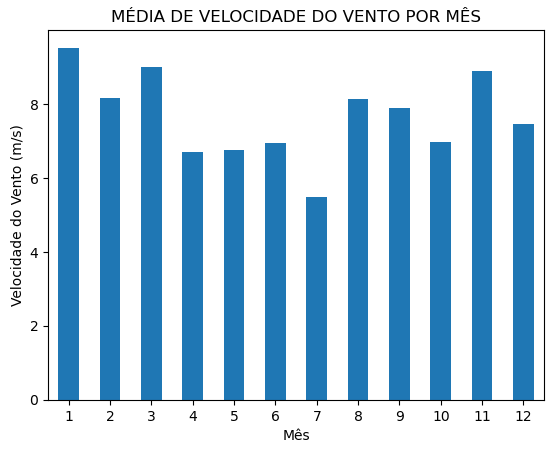

In [36]:
df_HoraMes.groupby('Mes').mean().Velocidade_Vento.plot(kind='bar', title='MÉDIA DE VELOCIDADE DO VENTO POR MÊS', rot=0)
plt.ylabel('Velocidade do Vento (m/s)')
plt.xlabel('Mês')

Text(0.5, 0, 'Mês')

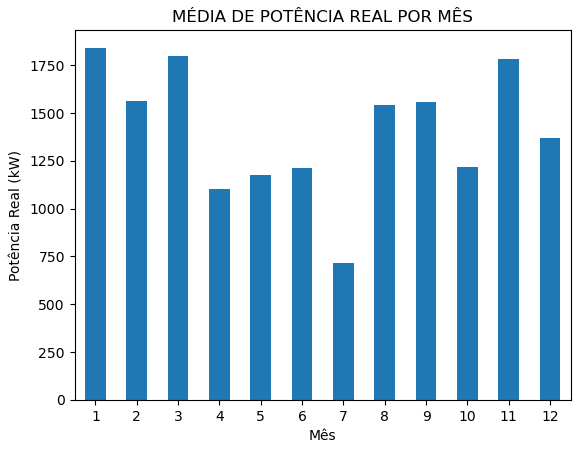

In [37]:
df_HoraMes.groupby('Mes').mean().Potencia_Real.plot(kind='bar', title='MÉDIA DE POTÊNCIA REAL POR MÊS', rot=0)
plt.ylabel('Potência Real (kW)')
plt.xlabel('Mês')

##### Como podemos ver no gráfico de Média de potência real por hora, entre as 16h e 23h temos as maiores potências reais e entre 8h e 12h temos os menores valores.
##### Nos gráficos de média por mês podemos ver que tanto a velocidade do vento e quanto a potência real possuem o mesmo formato, indicando a forte correlação ente as duas variáveis.

# Previsão de Energia
#### Máquina de vetors de suporte
##### Fizemos nosso primeiro modelo, SVM, que vai modelar os dados sem informações temporais como características (hora e mês). Gostaríamos de investigar "matematicamente" a potência da turbina em função da velocidade e direção do vento.

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor as DTRegressor
from sklearn.ensemble import RandomForestRegressor as RFRegressor
from sklearn.ensemble import AdaBoostRegressor as Ada
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [41]:
df_ML = pd.DataFrame(df_turbina)
df_ML['Data'] = pd.to_datetime(df_ML['Data'])
df_ML.set_index('Data', inplace=True)
df_ML.head()

,Potencia_Real,Velocidade_Vento,Potencia_Teorica,Direção_Vento,Hora,Mes
Data,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1


In [42]:
# Recursos e alvo, usando apenas a direção e a velocidade do vento
X = df_ML[['Direção_Vento', 'Velocidade_Vento']]
y = df_ML['Potencia_Real']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = make_pipeline(StandardScaler(), SVR())

r2_cv = cross_val_score(pipe, X_train, y_train, cv=6)
print(r2_cv)
print(np.mean(r2_cv))

[0.96163163 0.95203046 0.9563283  0.95718941 0.95244391 0.95576202]
0.9558976202418039


###### A pontuação R2 de validação cruzada de 6 vezes do nosso modelo SVM é de 95%.

In [43]:
# Ajuste do modelo SVM
pipe.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred = pipe.predict(X_test)

# Treinamento R2
print(f'Train R2: {pipe.score(X_train, y_train)}')

# Teste R2, MSE, MAE
print(f'Test R2: {pipe.score(X_test, y_test)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred)}')

Train R2: 0.958021096989251
Test R2: 0.958749373819918
Test MAE: 131.94910965782913
Test MSE: 69603.89383161056


Text(0, 0.5, 'Predicted Active Power')

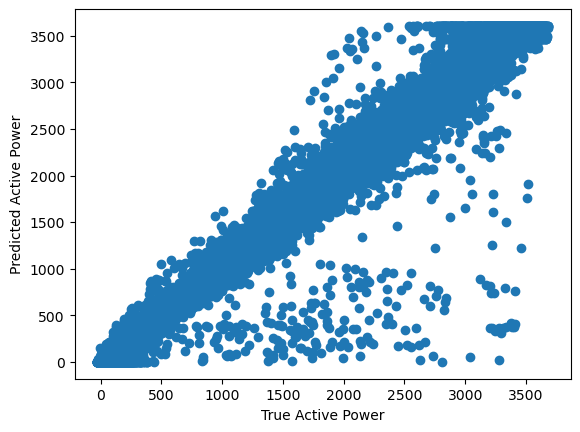

In [44]:
plt.scatter(y_pred, y_test)
plt.xlabel('True Active Power')
plt.ylabel('Predicted Active Power')

##### Previsão em séries temporais

In [45]:
y_pred_all = pipe.predict(X)

In [46]:
# Potência prevista no dataframe
y_pred = pd.DataFrame(y_pred_all, columns=['Potencia_Real'])
y_pred.index = y.index

y_pred.head()

,Potencia_Real
Data,
2018-01-01 00:00:00,362.258479
2018-01-01 00:10:00,465.719345
2018-01-01 00:20:00,336.644842
2018-01-01 00:30:00,461.750099
2018-01-01 00:40:00,437.787081


Text(0, 0.5, 'Active Power [kW]')

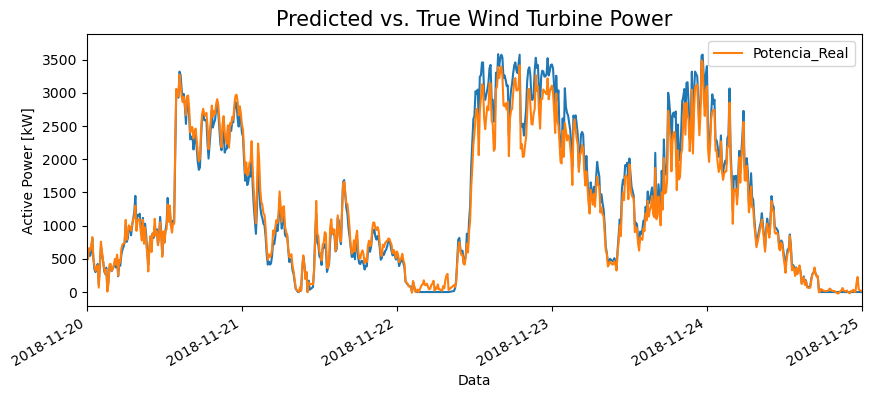

In [47]:
# Potência real (azul) vs. Potência Teórica (laranja)
t = df_ML.index
ax = y.plot(figsize=(10,4), xlim=(np.datetime64('2018-01-01'), np.datetime64('2018-11-25')))
y_pred.plot(figsize=(10,4), xlim=(np.datetime64('2018-11-20'), np.datetime64('2018-11-25')), ax=ax)
plt.title('Predicted vs. True Wind Turbine Power', size=15)
plt.ylabel('Active Power [kW]')

##### Vamos visualizar a função não linear (nosso hiperplano SVM) da Potência Ativa em função da Velocidade e Direção do Vento, P = f(ws,wd)

In [48]:
ws = np.linspace(0, 26, 50)
wd = np.linspace(0, 360, 50)
ws, wd = np.meshgrid(ws, wd)

# Dataframe do espaço de previsão
X_space = pd.DataFrame({'Direção_Vento': wd.flatten(), 'Velocidade_Vento': ws.flatten()})

y_pred_space = pipe.predict(X_space)

In [49]:
pipe.steps[1][1].get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [50]:
pipe.steps[1][1]._gamma

0.5000000000000001

Text(0.5, 0.92, 'SVM (C=1, Gamma=0.5)')

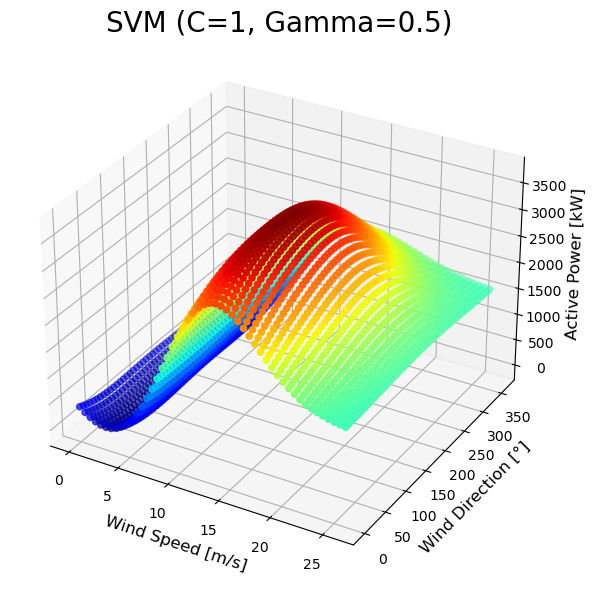

In [51]:
# Criando figura
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Criando plot
ax.scatter3D(X_space.Velocidade_Vento.values, X_space.Direção_Vento.values, y_pred_space, 
             c=y_pred_space, cmap='jet')

ax.set_xlabel('Wind Speed [m/s]', size=12)
ax.set_ylabel('Wind Direction [°]', size=12)
ax.set_zlabel('Active Power [kW]', size=12)
ax.set_title('SVM (C=1, Gamma=0.5)', size=20)